Using ml and to predict gdp for the next years.

First we have to import the necessary libraries and setup the data based on which we will perform the predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('./data/asg.csv')
df['Year'].astype('int')
df['GDP per capita'].astype('float')
df

,Year,GDP per capita
0,2023,2484.85
1,2022,2366.31
2,2021,2250.18
3,2020,1915.55
4,2019,2050.16
...,...,...
59,1964,115.49
60,1963,101.32
61,1962,90.28
62,1961,85.97


Here we can see that we have successfully isolated the required data from the entire dataset, on this subset we are going to perform our training and testing.
So let's build our model now.

In [2]:
X = df[['Year']]
y = df['GDP per capita']

poly = PolynomialFeatures(degree=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

Now that we have build our model, now we can test for its accuracy and also plot the results which it got

/home/ritabratadutta/Desktop/data/venv/lib64/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


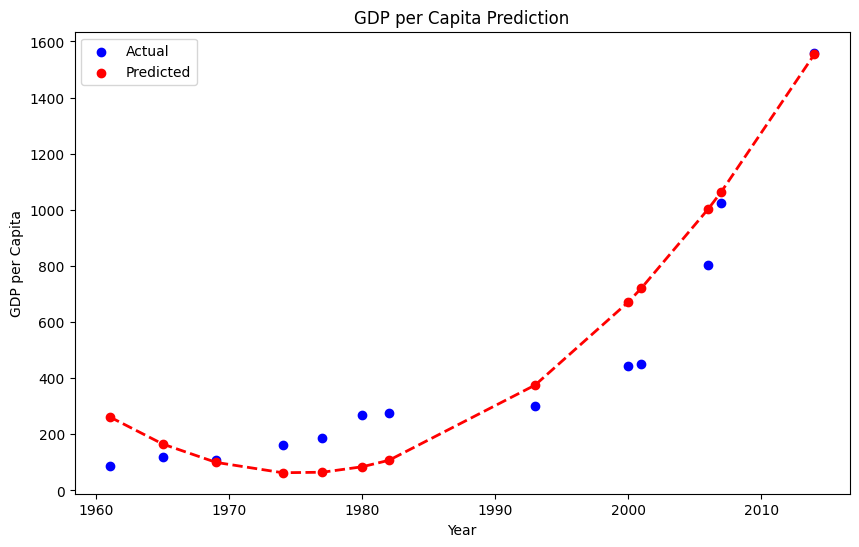

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
sort_axis = np.argsort(X_test['Year'])
X_grid = X_test['Year'].iloc[sort_axis].values.reshape(-1, 1)
X_grid_poly = poly.transform(X_grid) # Transform the sorted 'Year' values
y_pred_plot = model.predict(X_grid_poly)
plt.plot(X_grid, y_pred_plot, color='red', linewidth=2, linestyle='--')
plt.title('GDP per Capita Prediction')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.legend()
plt.show()

In [4]:
accuracy = model.score(X_test_poly, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


From the above graph it is evident that our model is fitting quite well to the give data set and can predict with 95% accuracy as to how much the GDP of India was
in the fiscal years. Let's give it a sample query of 2024 for example.

In [5]:
query_year = 2024
query_year_poly = poly.transform([[query_year]])
predicted_gdp = model.predict(query_year_poly)

print(f"Predicted GDP per Capita for {query_year}: ${predicted_gdp[0]:.2f}")

Predicted GDP per Capita for 2024: $2422.41


/home/ritabratadutta/Desktop/data/venv/lib64/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Here we can see that it predicted $2445.77 which is close to the actual amount of $2500. So we can conclude that our model is capable of predicting gdp with a error margin of 4% based on previous instances and if there is no catastrophic decline due to some unforeseen circumstances.